In [124]:
#importing the neccesary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [125]:
#collect the data and preprocess the data
df= pd.read_csv("mart.csv")

In [126]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [127]:
#check how many raws and columns are there
df.shape

(5681, 11)

In [128]:
#there are null value or not
df.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [130]:
#handling messing value on item_weight columns
df["Item_Weight"].mean()

12.695633368756642

In [131]:
#filling the null value with mean of item_weight columns
df["Item_Weight"].fillna(df["Item_Weight"].mean(), inplace= True)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [133]:
#handling missing value on outlet_size columns
df["Outlet_Size"].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [134]:
#filling the null value with mode on outlet_size
mode= df.pivot_table(values= "Outlet_Size", columns= "Outlet_Type", aggfunc= (lambda x: x.mode()[0]))

In [135]:
mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [136]:
miss_value= df["Outlet_Size"].isnull()

In [137]:
miss_value

0       False
1        True
2        True
3        True
4       False
        ...  
5676    False
5677    False
5678     True
5679     True
5680     True
Name: Outlet_Size, Length: 5681, dtype: bool

In [138]:
df.loc[miss_value, "Outlet_Size"]= df.loc[miss_value, "Outlet_Type"].apply(lambda x: mode[x])

In [139]:
#checking null value or not
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [140]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.245189,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,9.195000,0.027047,94.412000,1987.000000
50%,12.695633,0.054154,141.415400,1999.000000
75%,15.850000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [141]:
#data analysis
sns.set()

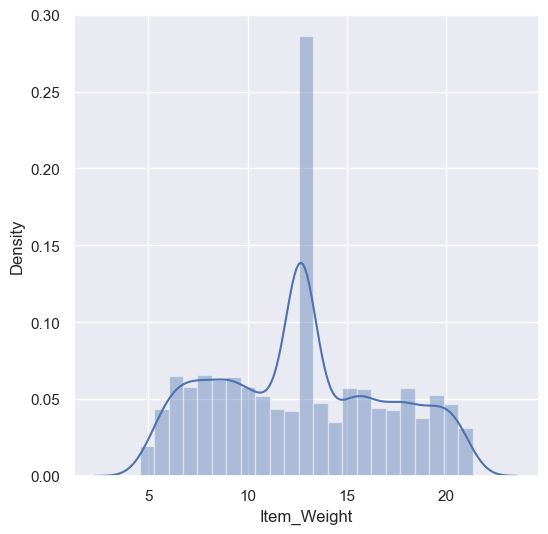

In [142]:
plt.figure(figsize= (6, 6))
sns.distplot(df["Item_Weight"])
plt.show()

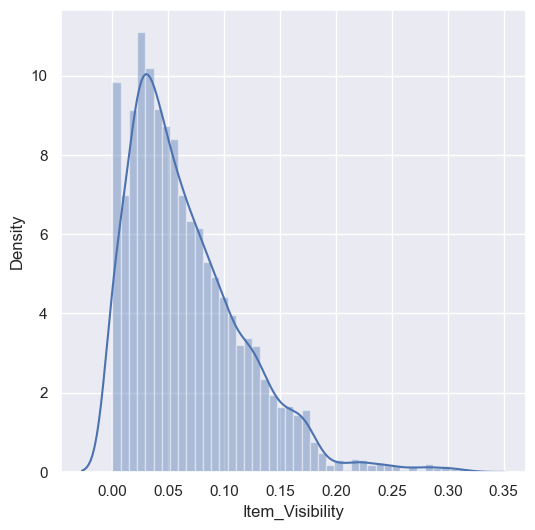

In [143]:
plt.figure(figsize= (6, 6))
sns.distplot(df["Item_Visibility"])
plt.show()

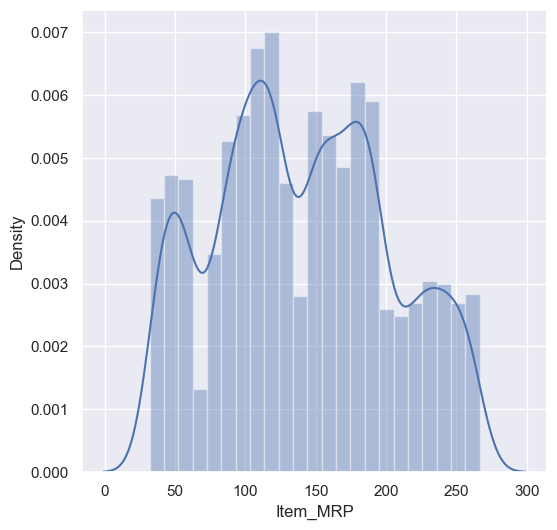

In [144]:
plt.figure(figsize= (6, 6))
sns.distplot(df["Item_MRP"])
plt.show()

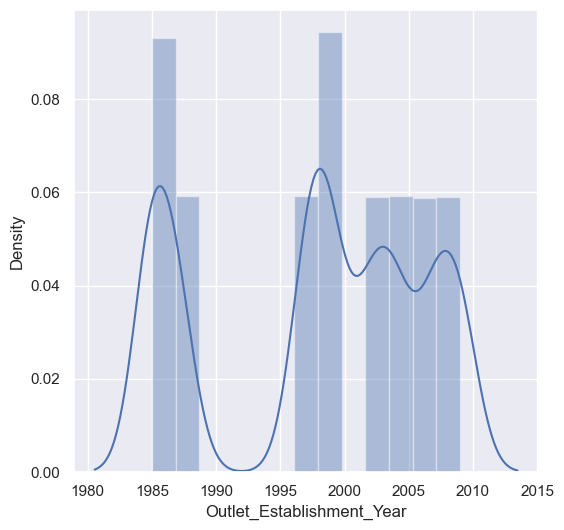

In [145]:
plt.figure(figsize= (6, 6))
sns.distplot(df["Outlet_Establishment_Year"])
plt.show()

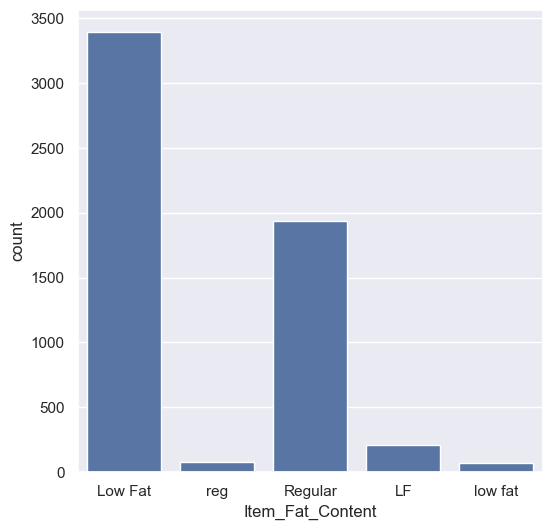

In [146]:
plt.figure(figsize= (6, 6))
sns.countplot(x= "Item_Fat_Content", data= df)
plt.show()

In [147]:
df["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: count, dtype: int64

In [148]:
df.replace({"Item_Fat_Content": {"LF": "Low Fat", "low fat": "Low Fat", "reg": "Regular"}}, inplace= True)

In [149]:
df["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    3668
Regular    2013
Name: count, dtype: int64

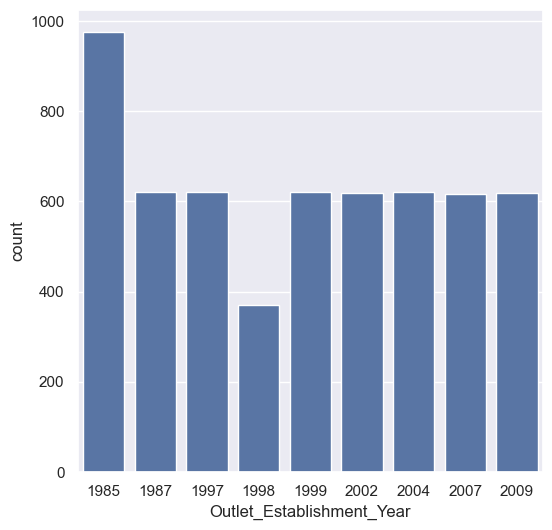

In [150]:
plt.figure(figsize= (6, 6))
sns.countplot(x= "Outlet_Establishment_Year", data= df)
plt.show()

In [151]:
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,Regular,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1
2,NCN55,14.60,Low Fat,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store


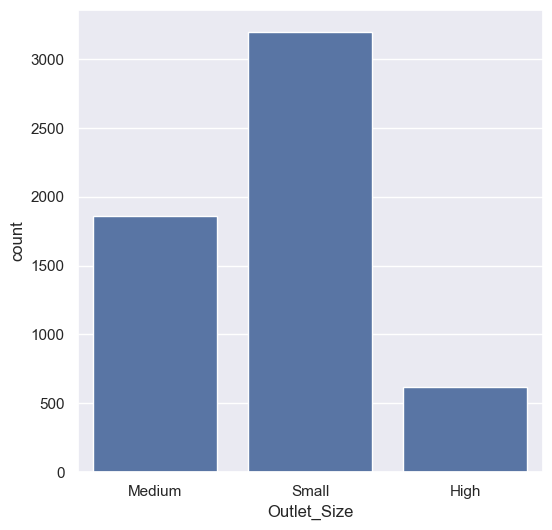

In [152]:
plt.figure(figsize= (6, 6))
sns.countplot(x= "Outlet_Size", data= df)
plt.show()

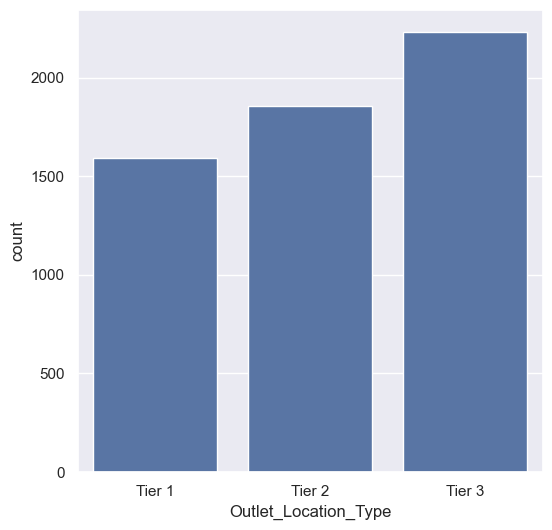

In [153]:
plt.figure(figsize= (6, 6))
sns.countplot(x= "Outlet_Location_Type", data= df)
plt.show()

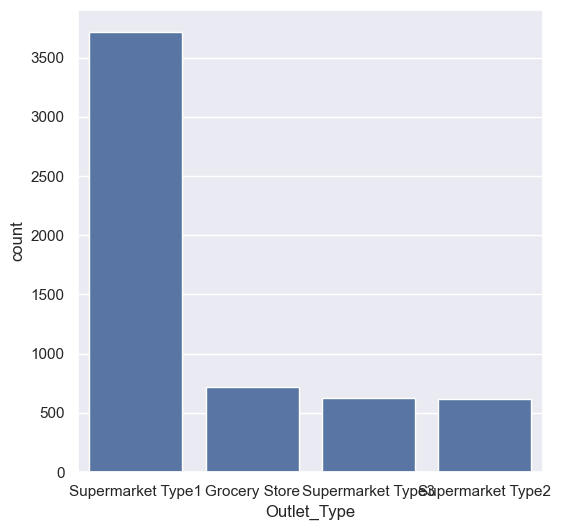

In [154]:
plt.figure(figsize= (6, 6))
sns.countplot(x= "Outlet_Type", data= df)
plt.show()

In [155]:
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,Regular,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1
2,NCN55,14.60,Low Fat,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store


In [156]:
#Label Encoding
le= LabelEncoder()

data= ["Item_Identifier", "Item_Fat_Content", "Item_Type", "Outlet_Identifier", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type"]

for i in data:
    df[i]= le.fit_transform(df[i])
    

In [157]:
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.75,0,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.30,1,0.038428,4,87.3198,2,2007,2,1,1
2,1406,14.60,0,0.099575,11,241.7538,0,1998,2,2,0


In [158]:
#seprate the data
X= df.drop(["Outlet_Type"], axis= 1)
Y= df["Outlet_Type"]

In [159]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                1103    20.750000                 0         0.007565   
1                1067     8.300000                 1         0.038428   
2                1406    14.600000                 0         0.099575   
3                 809     7.315000                 0         0.015388   
4                1184    12.695633                 1         0.118599   
...               ...          ...               ...              ...   
5676              231    10.500000                 1         0.013496   
5677              306     7.600000                 1         0.142991   
5678             1412    10.000000                 0         0.073529   
5679              517    15.300000                 1         0.000000   
5680              987     9.500000                 1         0.104720   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0            13  107.8622                  9    

In [160]:
print(Y)

0       1
1       1
2       0
3       1
4       3
       ..
5676    1
5677    2
5678    1
5679    1
5680    1
Name: Outlet_Type, Length: 5681, dtype: int32


In [161]:
#data splitting into train, test and split
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, random_state= 42, test_size= 0.2)

In [162]:
print(X.shape, X_train.shape, X_test.shape)

(5681, 10) (4544, 10) (1137, 10)


In [163]:
#model build and training
xgb= XGBRegressor()
xgb.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [164]:
#model evaluation
#prediction on train data
train_pred= xgb.predict(X_train)

#r2 score
train_score= metrics.r2_score(Y_train, train_pred)
print(train_score)

0.999999999094065


In [165]:
#model evaluation
#prediction on test data
test_pred= xgb.predict(X_test)

#r2 score
test_score= metrics.r2_score(Y_test, test_pred)
print(test_score)

0.9999999990563668
